# Introduction to AI/Machine Learning

## Artificial Intelligence and Machine Learning. What are they?
Artificial Intelligence, or AI, is a field of computer science that focuses on creating machines capable of intelligent behaviour. Machine Learning, a vital subset of AI, has evolved significantly since its conceptualization. Coined by Arthur Samuel in 1959, ML was initially described as the field in which computers have the ability to learn without being explicitly programmed. Over the years, this field has grown exponentially, propelled by advancements in computational power and data availability. Today's ML algorithms can analyze complex datasets, recognize patterns, and make predictions with remarkable accuracy. These capabilities have made ML an indispensable tool in numerous fields, including Earth observation, where it helps in analysing satellite imagery and climate data.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Understanding the Machine Learning Processing Chain
### The Lifecycle of a Machine Learning Project
Machine Learning projects typically follow a structured process, often referred to as the ML processing chain. This chain comprises several key stages, each crucial for the success of the project. Understanding this workflow is essential for anyone delving into the field of ML, especially in applications like Earth observation.
1. **Problem definition**: Before any data is collected or models are built, it's essential to clearly define the problem you're trying to solve with ML. This includes understanding the objectives, constraints, and the potential impact of the solution. For example, the major problem we will be discussing is discrimination of sea-ice and lead.
2. **Data Collection**: Data is the cornerstone of any ML project. This stage involves gathering the necessary data relevant to the problem. The quality, quantity, and variety of data can significantly influence the model's performance. Collecting a dataset of satellite images like OLCI, will be the general process of collecting data. However, the raw data we will use are mostly publicly available online for downloading.
3. **Data preprocessing**: Raw data often needs to be cleaned and formatted before it can be used. This step includes converting the raw data into data that can be interpretable by ML models, it also includes handling missing values, normalising data, and feature engineering. In previous chapters, we introduced a way to creating machine learning dataset by IRIS.
4. **Feature Selection and Engineering**: Features are the attributes used by ML models to make predictions. Feature selection involves choosing the most relevant attributes, while feature engineering involves creating new features from the existing data. For example, every bands in 21 bands of OLCI imagery will be one attribute and we may retain all of the features if they are all important, and we may also discard some of them if they are not useful and redundant.
5. **Model Selection and Training**: This stage involves choosing an appropriate ML algorithm and using the processed data to train the model. The choice of algorithm depends on the problem type, data characteristics, and desired outcome.
6. **Model Evaluation**: Once a model is trained, it's evaluated to determine its performance. Common evaluation metrics include accuracy, precision, recall, and the F1 score.
7. **Model Optimization**: Based on the evaluation results, the model might need to be fine-tuned. This can involve adjusting parameters, using different algorithms, or further preprocessing the data. This may involve tweaking hyperparameters of the model to improve accuracy.




# Core concepts
## Types of Machine Learning
Before delving into specific concepts, it's essential to distinguish between the two primary variations of AI and ML algorithms.
### Supervised Learning
In supervised learning, the algorithm is trained on a labeled dataset. This dataset provides the algorithm with example inputs and their corresponding outputs. The goal is to learn a mapping from inputs to outputs, allowing the model to make predictions on unseen data. A classic example is image recognition, where the model is trained on a dataset of labeled images and learns to recognize and categorize new images.
Below shows an example of supervised learning: Simple Linear Regression

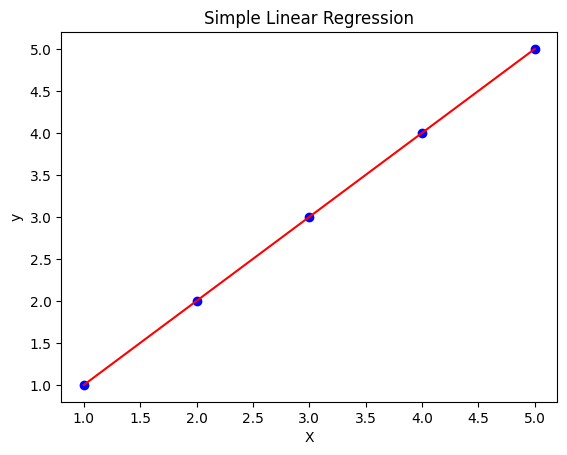

In [2]:
# Python code for linear regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

# Model training
model = LinearRegression()
model.fit(X, y)

# Predictions
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


### Unsupervised Learning
Unsupervised learning involves working with data that doesn't have labels. The algorithms seek to identify inherent structures or patterns in the data. A common technique in unsupervised learning is clustering, where data is grouped based on similarities. For instance, clustering can be used to segment customers in a market based on their purchasing habits. Below shows an example of unsupervised learning: K-Means Clustering

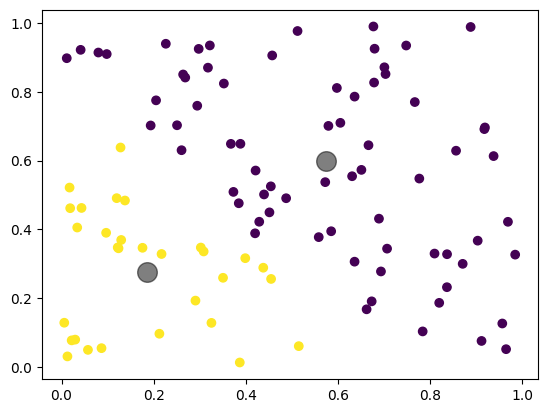

In [ ]:
# Python code for K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# K-means model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


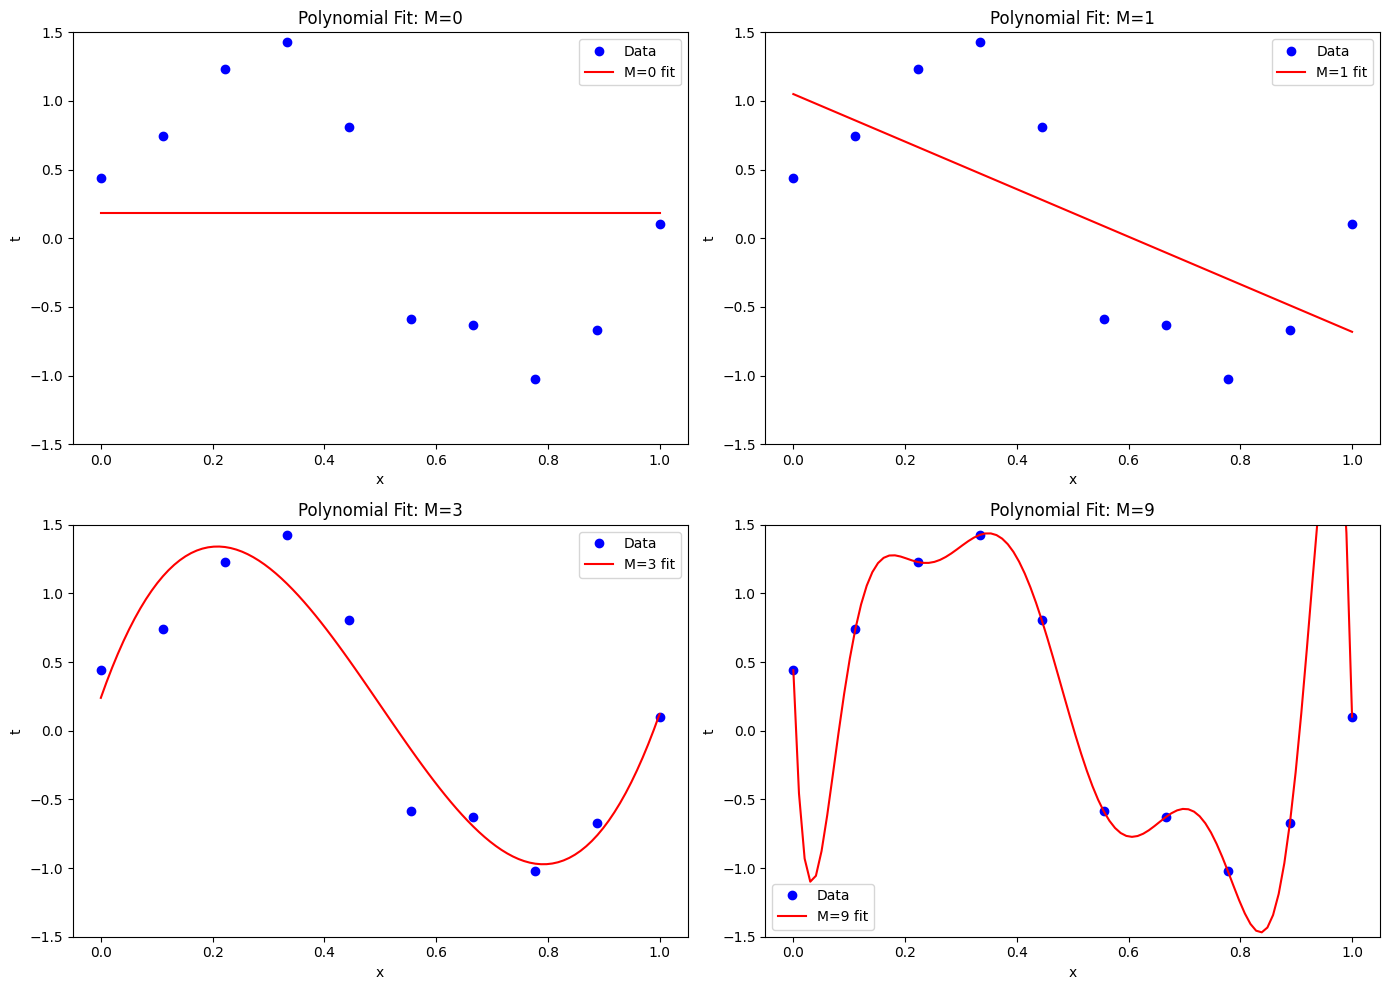

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 1, 10)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=x.shape)

# Polynomial degrees to be considered
degrees = [0, 1, 3, 9]

plt.figure(figsize=(14, 10))

# Fit and plot polynomial for each degree
for i, degree in enumerate(degrees):
    coefs = Polynomial.fit(x, y, degree).convert().coef
    p = np.poly1d(coefs[::-1])
    x_poly = np.linspace(0, 1, 100)
    y_poly = p(x_poly)

    plt.subplot(2, 2, i+1)
    plt.plot(x, y, 'bo', label='Data')
    plt.plot(x_poly, y_poly, 'r-', label=f'M={degree} fit')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(f'Polynomial Fit: M={degree}')
    plt.ylim(-1.5, 1.5)
    plt.legend()

plt.tight_layout()
plt.show()

## Overfitting and Underfitting in Machine Learning

### Overfitting: The Peril of Learning Too Much
Overfitting is akin to a student who memorizes facts but fails to understand the underlying principles. In machine learning, this happens when a model learns the training data too thoroughly - capturing noise and anomalies as if they were significant patterns. The model thus becomes excellent at predicting or fitting the training data but fails to perform well on any new data, losing its ability to generalize. Imagine a model trained to recognize cats in photos, but it focuses too much on irrelevant details like the photo's background. It performs well with the training images but poorly with new images of cats in different settings.

### Underfitting: The Problem of Oversimplification
Underfitting occurs when a model is too simple to capture the complexity and variability in the data, resulting in a model that performs poorly even on the training data. It's unable to make accurate predictions or decisions because it hasn’t learned enough. For example, a linear regression model trying to capture a complex, non-linear relationship in data would typically underfit, much like trying to fit a straight line through a wildly curving dataset.

## Loss Functions and Optimizers

### Loss Functions: Gauging Model Accuracy
A loss function, also known as a cost function, quantifies how far off a model’s predictions are from the actual values. It’s a method of evaluating how well the algorithm models the given data. If predictions deviate significantly from actual results, the loss function will output a higher number. Minimizing this loss is central to training an effective model. Common loss functions include Mean Squared Error for regression tasks and Cross-Entropy for classification tasks.

### Optimizers: Steering the Learning Process
Optimizers are algorithms or methods used to change the attributes of the neural network, like weights, to reduce the loss function. An optimizer iteratively adjusts parameters like learning rate to find the model configuration that minimizes loss. Common optimizers include Gradient Descent, Stochastic Gradient Descent (SGD), and Adam (Adaptive Moment Estimation).

## Training Set and Test Set

### Partitioning Data: Training and Testing
In ML, datasets are typically split into a training set and a test set. The training set is used to teach or 'train' the model, while the test set is used to evaluate its performance. This split is crucial to validate the model's ability to generalize to new data. If a model is only evaluated on the data it was trained on, there's no way to know if it has learned meaningful patterns or just memorized the data.


